# Aprendizagem HW 2

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Configuração para melhor visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Carregar o dataset
df = pd.read_csv('Breast_cancer_dataset.csv')

# Verificar valores faltantes
nan_cols = df.columns[df.isnull().any()].tolist()
if nan_cols:
    df = df.drop(columns=nan_cols)

X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# Converter diagnóstico para valores binários (M=1, B=0)
y = y.map({'M': 1, 'B': 0})

# Configurar 5-fold stratified cross-validation com shuffling
# Utilizando o random_state para garantir a mesma configuração de fold em toda execução
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 

## Questão 1

### Linha a

In [ ]:
# Inicializar os modelos
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()

# Calcular scores de validação cruzada para kNN
scores_knn = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')

# Calcular scores de validação cruzada para Naïve Bayes
scores_nb = cross_val_score(nb, X, y, cv=cv, scoring='accuracy')

print("=" * 70)
print("QUESTÃO A: COMPARAÇÃO kNN vs NAÏVE BAYES (SEM ESCALONAMENTO)")
print("=" * 70)
print("\nResultados kNN (k=5):")
print(f"   Acurácias por fold: {scores_knn}")
print(f"   Acurácia média: {scores_knn.mean():.4f}")
print(f"   Desvio padrão: {scores_knn.std():.4f}")

print("\nResultados Naïve Bayes:")
print(f"   Acurácias por fold: {scores_nb}")
print(f"   Acurácia média: {scores_nb.mean():.4f}")
print(f"   Desvio padrão: {scores_nb.std():.4f}")

QUESTÃO A: COMPARAÇÃO kNN vs NAÏVE BAYES (SEM ESCALONAMENTO)

📊 Resultados kNN (k=5):
   Acurácias por fold: [0.92982456 0.90350877 0.92982456 0.95614035 0.95575221]
   Acurácia média: 0.9350
   Desvio padrão: 0.0196

📊 Resultados Naïve Bayes:
   Acurácias por fold: [0.96491228 0.90350877 0.92982456 0.92982456 0.96460177]
   Acurácia média: 0.9385
   Desvio padrão: 0.0235


/tmp/ipykernel_109468/2080205656.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(data_to_plot, labels=['kNN (k=5)', 'Naïve Bayes'])


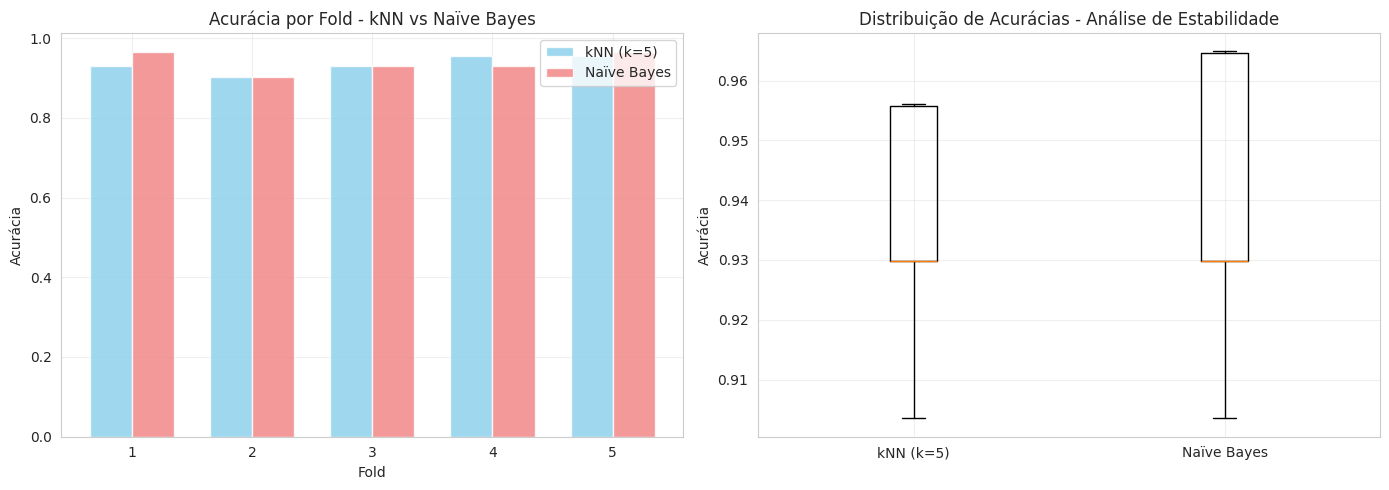

In [4]:
# Visualização comparativa
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras com acurácias por fold
folds = np.arange(1, 6)
x = np.arange(len(folds))
width = 0.35

axes[0].bar(x - width/2, scores_knn, width, label='kNN (k=5)', alpha=0.8, color='skyblue')
axes[0].bar(x + width/2, scores_nb, width, label='Naïve Bayes', alpha=0.8, color='lightcoral')
axes[0].set_xlabel('Fold')
axes[0].set_ylabel('Acurácia')
axes[0].set_title('Acurácia por Fold - kNN vs Naïve Bayes')
axes[0].set_xticks(x)
axes[0].set_xticklabels(folds)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot para visualizar estabilidade
data_to_plot = [scores_knn, scores_nb]
axes[1].boxplot(data_to_plot, labels=['kNN (k=5)', 'Naïve Bayes'])
axes[1].set_ylabel('Acurácia')
axes[1].set_title('Distribuição de Acurácias - Análise de Estabilidade')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Observamos que o Naïve Bayes apresentou uma maior estabilidade em relação ao kNN.

As métricas obtidas foram:
Desvio padrão (Naïve Bayes): 0,0235
Desvio padrão (kNN): 0,0196

Com base no desvio padrão, observamos que o kNN apresentou uma estabilidade maior que o Naïve Bayes (0.0196 vs. 0.0235). Isso significa que, entre os diferentes folds da validação cruzada, o desempenho do kNN variou menos.

Essa diferença pode ser explicada pelo fato de que, ao introduzir embaralhamento na divisão dos folds, a composição dos conjuntos de treino/teste muda mais significativamente. O Naïve Bayes, por ser sensível a variações nas distribuições condicionais e trabalhar com suposições probabilísticas fortes, pode ter uma oscilação ligeiramente maior dependendo do particionamento.

Por outro lado, o kNN toma decisões baseadas na proximidade de exemplos reais e, nesse caso, manteve uma performance mais consistente entre os folds.

### Linha B: kNN com Min-Max Scaler

In [ ]:
# Criar pipeline com Min-Max Scaler e kNN
knn_scaled = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Calcular scores com validação cruzada
scores_knn_scaled = cross_val_score(knn_scaled, X, y, cv=cv, scoring='accuracy')

print("\nResultados kNN com Min-Max Scaler:")
print(f"   Acurácias por fold: {scores_knn_scaled}")
print(f"   Acurácia média: {scores_knn_scaled.mean():.4f}")
print(f"   Desvio padrão: {scores_knn_scaled.std():.4f}")

print("\nComparação com kNN sem escalonamento:")
print(f"   Acurácia média (sem scaler): {scores_knn.mean():.4f}")
print(f"   Acurácia média (com scaler): {scores_knn_scaled.mean():.4f}")
print(f"   Melhoria absoluta: {(scores_knn_scaled.mean() - scores_knn.mean()):.4f}")
print(f"   Melhoria percentual: {((scores_knn_scaled.mean() - scores_knn.mean()) / scores_knn.mean() * 100):.2f}%")

print("\nComparação de estabilidade:")
print(f"   Desvio padrão (sem scaler): {scores_knn.std():.4f}")
print(f"   Desvio padrão (com scaler): {scores_knn_scaled.std():.4f}")
print(f"   Redução na variância: {(scores_knn.std() - scores_knn_scaled.std()):.4f}")


📊 Resultados kNN com Min-Max Scaler:
   Acurácias por fold: [0.98245614 0.95614035 0.92982456 0.98245614 0.96460177]
   Acurácia média: 0.9631
   Desvio padrão: 0.0195

📊 Comparação com kNN sem escalonamento:
   Acurácia média (sem scaler): 0.9350
   Acurácia média (com scaler): 0.9631
   Melhoria absoluta: 0.0281
   Melhoria percentual: 3.00%

📊 Comparação de estabilidade:
   Desvio padrão (sem scaler): 0.0196
   Desvio padrão (com scaler): 0.0195
   Redução na variância: 0.0001


/tmp/ipykernel_109468/664243734.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1].boxplot(data_to_plot, labels=['Sem Scaler', 'Com Min-Max'], patch_artist=True)


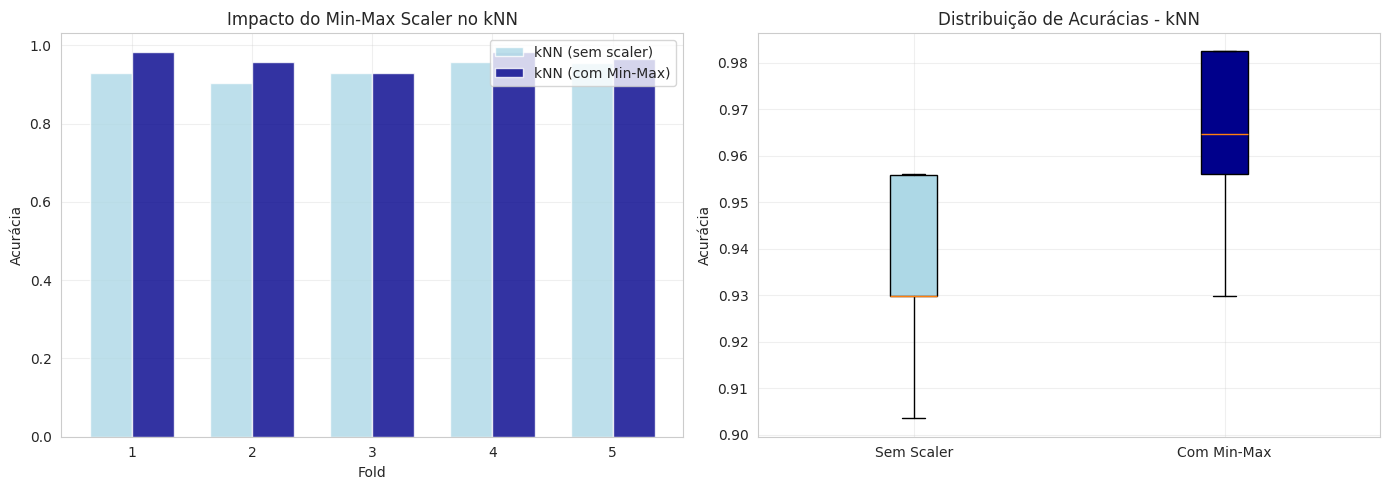

In [6]:
# Visualização do impacto do escalonamento
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras comparativo
folds = np.arange(1, 6)
x = np.arange(len(folds))
width = 0.35

axes[0].bar(x - width/2, scores_knn, width, label='kNN (sem scaler)', alpha=0.8, color='lightblue')
axes[0].bar(x + width/2, scores_knn_scaled, width, label='kNN (com Min-Max)', alpha=0.8, color='darkblue')
axes[0].set_xlabel('Fold')
axes[0].set_ylabel('Acurácia')
axes[0].set_title('Impacto do Min-Max Scaler no kNN')
axes[0].set_xticks(x)
axes[0].set_xticklabels(folds)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot comparativo
data_to_plot = [scores_knn, scores_knn_scaled]
bp = axes[1].boxplot(data_to_plot, labels=['Sem Scaler', 'Com Min-Max'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('darkblue')
axes[1].set_ylabel('Acurácia')
axes[1].set_title('Distribuição de Acurácias - kNN')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Após aplicar um Min-Max Scaler aos dados antes do treinamento, o classificador kNN (k = 5) apresentou um desempenho significativamente melhor. Os resultados foram:

Acurácias por fold: [0.98245614 0.95614035 0.92982456 0.98245614 0.96460177]

Acurácia média: 0,9631

Desvio padrão: 0,0195

Comparando com o modelo sem escalonamento, com acurácia média de 0.9350, observamos uma melhoria absoluta de 0.0281. Além disso, houve uma ligeira redução no desvio padrão, de 0.0196 para 0.0195, indicando também um pequeno ganho em estabilidade.

Esse resultado pode ser explicado pela natureza do kNN: trata-se de um algoritmo baseado em distâncias, geralmente Euclidianas. Assim quando há variáveis que possuam escalas muito diferentes (Exemplo: area_mean variando entre 143 e 2501, enquanto smoothness_mean varia entre 0,05 e 0,16) as variáveis de maior magnitude dominam o cálculo de distância. Isso faz com que variáveis potencialmente relevantes, mas que estão em menor escala, tenham seu impacto reduzido na decisão do modelo.

Ao aplicar o Min-Max Scaler, todas as features são normalizadas para o intervalo [0, 1], garantindo que cada variável contribua de forma proporcional para o cálculo das distâncias. Dessa forma, o kNN consegue capturar melhor os padrões presentes nos dados, resultando em maior acurácia e desempenho mais consistente entre os folds.

### Linha C: 

In [7]:
# Criar pipeline para Naïve Bayes com escalonamento (para comparação justa)
nb_scaled = Pipeline([
    ('scaler', MinMaxScaler()),
    ('nb', GaussianNB())
])

# Calcular scores para NB escalado
scores_nb_scaled = cross_val_score(nb_scaled, X, y, cv=cv, scoring='accuracy')

print("\nResultados dos modelos escalados:")
print(f"\n   kNN (escalado):")
print(f"   Acurácias: {scores_knn_scaled}")
print(f"   Média: {scores_knn_scaled.mean():.4f}")
print(f"   Desvio padrão: {scores_knn_scaled.std():.4f}")

print(f"\n   Naïve Bayes (escalado):")
print(f"   Acurácias: {scores_nb_scaled}")
print(f"   Média: {scores_nb_scaled.mean():.4f}")
print(f"   Desvio padrão: {scores_nb_scaled.std():.4f}")


Resultados dos modelos escalados:

   kNN (escalado):
   Acurácias: [0.98245614 0.95614035 0.92982456 0.98245614 0.96460177]
   Média: 0.9631
   Desvio padrão: 0.0195

   Naïve Bayes (escalado):
   Acurácias: [0.95614035 0.9122807  0.92982456 0.90350877 0.94690265]
   Média: 0.9297
   Desvio padrão: 0.0199


In [ ]:
# Realizar teste t pareado (paired t-test)
# Usamos teste pareado porque as avaliações são feitas nos mesmos folds
t_statistic, p_value = stats.ttest_rel(scores_knn_scaled, scores_nb_scaled)

print("\nResultados do teste:")
print(f"   Estatística t: {t_statistic:.4f}")
print(f"   Valor p (p-value): {p_value:.4f}")
print(f"   Diferença média: {(scores_knn_scaled.mean() - scores_nb_scaled.mean()):.4f}")


📈 Resultados do teste:
   Estatística t: 2.4881
   Valor p (p-value): 0.0676
   Diferença média: 0.0334


/tmp/ipykernel_109468/1026258760.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1].boxplot(data_to_plot, labels=['kNN\n(escalado)', 'Naïve Bayes\n(escalado)'], patch_artist=True)


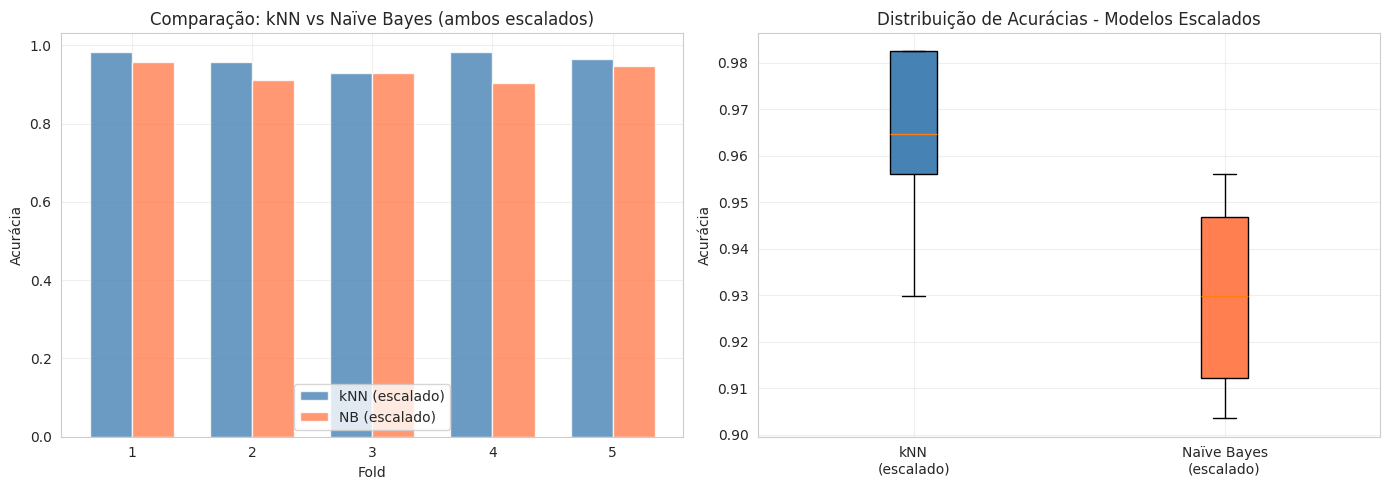

In [9]:
# Visualização comparativa final
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
folds = np.arange(1, 6)
x = np.arange(len(folds))
width = 0.35

axes[0].bar(x - width/2, scores_knn_scaled, width, label='kNN (escalado)', alpha=0.8, color='steelblue')
axes[0].bar(x + width/2, scores_nb_scaled, width, label='NB (escalado)', alpha=0.8, color='coral')
axes[0].set_xlabel('Fold')
axes[0].set_ylabel('Acurácia')
axes[0].set_title('Comparação: kNN vs Naïve Bayes (ambos escalados)')
axes[0].set_xticks(x)
axes[0].set_xticklabels(folds)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot comparativo
data_to_plot = [scores_knn_scaled, scores_nb_scaled]
bp = axes[1].boxplot(data_to_plot, labels=['kNN\n(escalado)', 'Naïve Bayes\n(escalado)'], patch_artist=True)
bp['boxes'][0].set_facecolor('steelblue')
bp['boxes'][1].set_facecolor('coral')
axes[1].set_ylabel('Acurácia')
axes[1].set_title('Distribuição de Acurácias - Modelos Escalados')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Para verificar se o kNN escalado apresenta desempenho estatisticamente superior ao Naïve Bayes escalado em termos de acurácia, foi realizado um teste t pareado utilizando o pacote scipy. Esse teste é apropriado porque compara os dois modelos sobre os mesmos folds de validação cruzada, levando em conta a dependência entre as observações pareadas.

### Resultados obtidos:

#### kNN (escalado)

Acurácias: [0.9825, 0.9561, 0.9298, 0.9825, 0.9646]

Média: 0,9631

Desvio padrão: 0,0195



#### Naïve Bayes (escalado)

Acurácias: [0.9561, 0.9123, 0.9298, 0.9035, 0.9469]

Média: 0,9297

Desvio padrão: 0,0199

### Teste t pareado:

#### Hipóteses

H₀: As médias de acurácia dos dois modelos são iguais.

H₁: As médias de acurácia dos dois modelos são diferentes.

#### Resultados do teste

Estatística t: 2,4881

Valor p: 0,0676

Nível de significância: α = 0,05

Diferença média: 0,0334 (3,34 pontos percentuais)


Como o p-valor (0,0676) é maior que o nível de significância (0,05), não rejeitamos a hipótese nula (H₀). Isso significa que não há evidências estatísticas suficientes para afirmar que os dois modelos têm desempenhos diferentes em termos de acurácia ao nível de 5% de significância.

Apesar de o kNN escalado ter apresentado uma média de acurácia superior (0,9631 vs 0,9297), essa diferença não é estatisticamente significativa segundo o teste t pareado. Assim, não podemos concluir que o kNN seja estatisticamente superior ao Naïve Bayes nesse cenário.

## Questão 2

### Linha A

In [10]:
# Dividir dados em treino (70%) e teste (30%)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,  # garante mesma divisão sempre
    stratify=y  # mantém proporção de classes
)

print("=" * 70)
print("QUESTÃO D: VARIAÇÃO DO NÚMERO DE VIZINHOS (k)")
print("=" * 70)
print(f"\nDivisão dos dados:")
print(f"   Treino: {X_train.shape[0]} amostras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Teste:  {X_test.shape[0]} amostras ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\n   Distribuição de classes no treino: {y_train.value_counts().to_dict()}")
print(f"   Distribuição de classes no teste:  {y_test.value_counts().to_dict()}")

QUESTÃO D: VARIAÇÃO DO NÚMERO DE VIZINHOS (k)

Divisão dos dados:
   Treino: 398 amostras (69.9%)
   Teste:  171 amostras (30.1%)

   Distribuição de classes no treino: {0: 250, 1: 148}
   Distribuição de classes no teste:  {0: 107, 1: 64}


In [11]:
# Escalonar os dados para kNN
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Valores de k a testar
k_values = [1, 5, 10, 15, 20, 25]
weights_types = ['uniform', 'distance']

# Dicionários para armazenar resultados
results = {
    'k': [],
    'weights': [],
    'train_accuracy': [],
    'test_accuracy': []
}

# Treinar modelos para cada combinação de k e weights
for k in k_values:
    for weight in weights_types:
        # Criar e treinar o modelo
        knn_model = KNeighborsClassifier(n_neighbors=k, weights=weight)
        knn_model.fit(X_train_scaled, y_train)
        
        # Calcular acurácias
        train_acc = knn_model.score(X_train_scaled, y_train)
        test_acc = knn_model.score(X_test_scaled, y_test)
        
        # Armazenar resultados
        results['k'].append(k)
        results['weights'].append(weight)
        results['train_accuracy'].append(train_acc)
        results['test_accuracy'].append(test_acc)
        
        print(f"\nk={k:2d}, weights={weight:8s} | Train: {train_acc:.4f} | Test: {test_acc:.4f}")

# Converter para DataFrame para facilitar análise
results_df = pd.DataFrame(results)


k= 1, weights=uniform  | Train: 1.0000 | Test: 0.9415

k= 1, weights=distance | Train: 1.0000 | Test: 0.9415

k= 5, weights=uniform  | Train: 0.9774 | Test: 0.9708

k= 5, weights=distance | Train: 1.0000 | Test: 0.9708

k=10, weights=uniform  | Train: 0.9698 | Test: 0.9591

k=10, weights=distance | Train: 1.0000 | Test: 0.9708

k=15, weights=uniform  | Train: 0.9673 | Test: 0.9591

k=15, weights=distance | Train: 1.0000 | Test: 0.9591

k=20, weights=uniform  | Train: 0.9673 | Test: 0.9532

k=20, weights=distance | Train: 1.0000 | Test: 0.9591

k=25, weights=uniform  | Train: 0.9623 | Test: 0.9591

k=25, weights=distance | Train: 1.0000 | Test: 0.9591


### Questão D.a: Gráfico de Acurácias de Treino e Teste

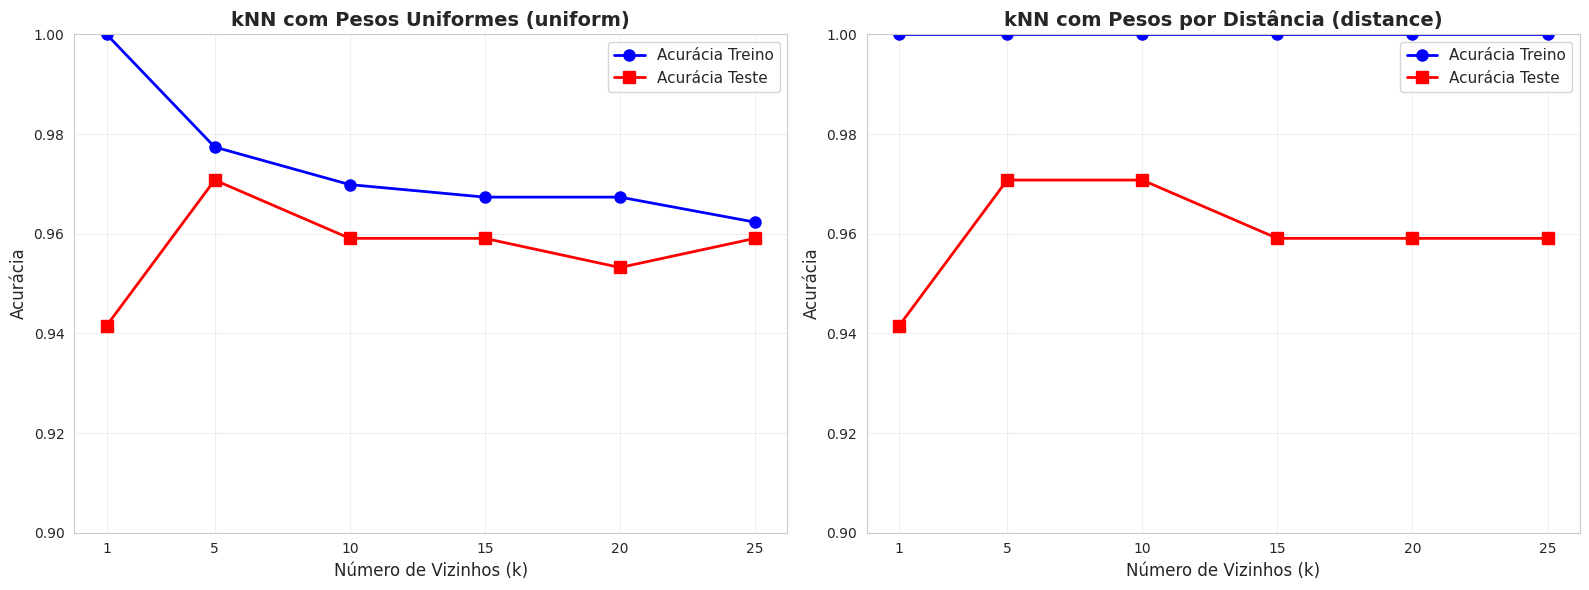

In [12]:
# Separar resultados por tipo de peso
results_uniform = results_df[results_df['weights'] == 'uniform']
results_distance = results_df[results_df['weights'] == 'distance']

# Criar visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Weights = Uniform
axes[0].plot(results_uniform['k'], results_uniform['train_accuracy'], 
             marker='o', linewidth=2, markersize=8, label='Acurácia Treino', color='blue')
axes[0].plot(results_uniform['k'], results_uniform['test_accuracy'], 
             marker='s', linewidth=2, markersize=8, label='Acurácia Teste', color='red')
axes[0].set_xlabel('Número de Vizinhos (k)', fontsize=12)
axes[0].set_ylabel('Acurácia', fontsize=12)
axes[0].set_title('kNN com Pesos Uniformes (uniform)', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(k_values)
axes[0].set_ylim([0.90, 1.0])

# Gráfico 2: Weights = Distance
axes[1].plot(results_distance['k'], results_distance['train_accuracy'], 
             marker='o', linewidth=2, markersize=8, label='Acurácia Treino', color='blue')
axes[1].plot(results_distance['k'], results_distance['test_accuracy'], 
             marker='s', linewidth=2, markersize=8, label='Acurácia Teste', color='red')
axes[1].set_xlabel('Número de Vizinhos (k)', fontsize=12)
axes[1].set_ylabel('Acurácia', fontsize=12)
axes[1].set_title('kNN com Pesos por Distância (distance)', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(k_values)
axes[1].set_ylim([0.90, 1.0])

plt.tight_layout()
plt.show()

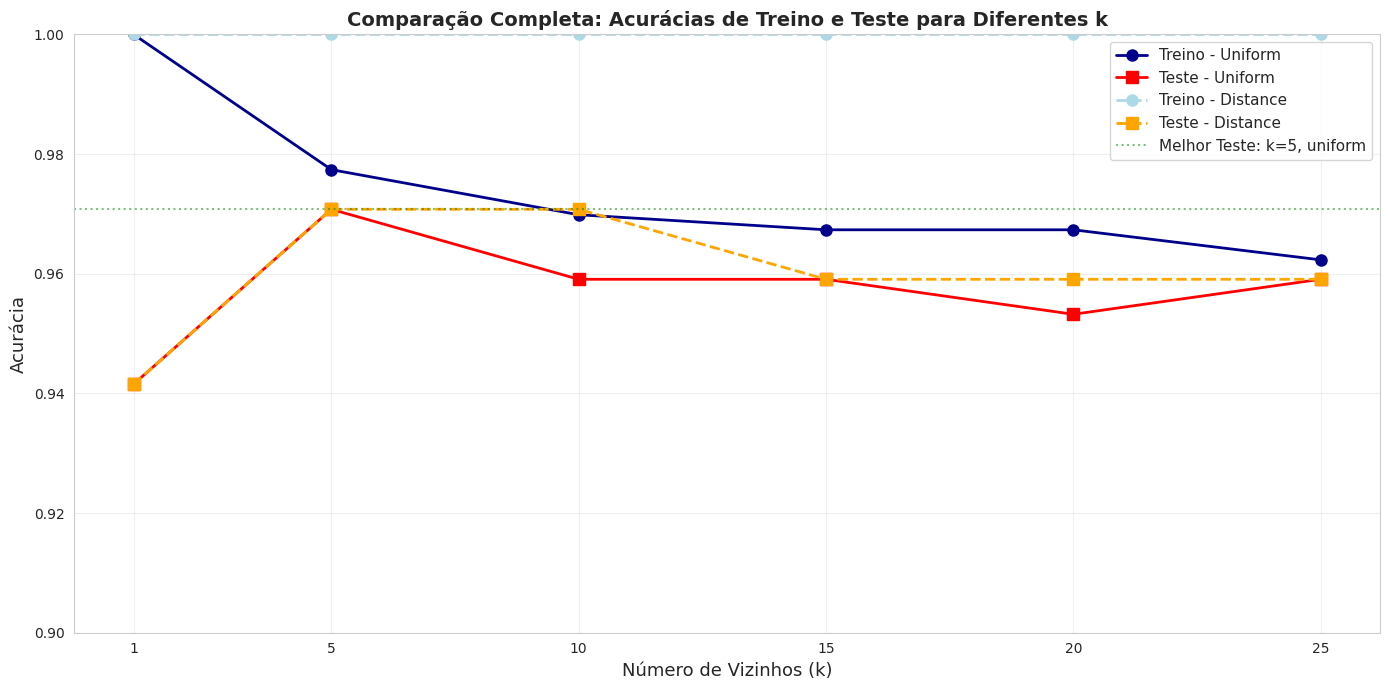

In [13]:
# Criar visualização comparativa adicional
fig, ax = plt.subplots(figsize=(14, 7))

# Plotar todas as curvas juntas
ax.plot(results_uniform['k'], results_uniform['train_accuracy'], 
        marker='o', linewidth=2, markersize=8, label='Treino - Uniform', 
        color='darkblue', linestyle='-')
ax.plot(results_uniform['k'], results_uniform['test_accuracy'], 
        marker='s', linewidth=2, markersize=8, label='Teste - Uniform', 
        color='red', linestyle='-')
ax.plot(results_distance['k'], results_distance['train_accuracy'], 
        marker='o', linewidth=2, markersize=8, label='Treino - Distance', 
        color='lightblue', linestyle='--')
ax.plot(results_distance['k'], results_distance['test_accuracy'], 
        marker='s', linewidth=2, markersize=8, label='Teste - Distance', 
        color='orange', linestyle='--')

ax.set_xlabel('Número de Vizinhos (k)', fontsize=13)
ax.set_ylabel('Acurácia', fontsize=13)
ax.set_title('Comparação Completa: Acurácias de Treino e Teste para Diferentes k', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)
ax.set_xticks(k_values)
ax.set_ylim([0.90, 1.0])

# Adicionar linha para indicar melhor performance de teste
best_idx = results_df['test_accuracy'].idxmax()
best_k = results_df.loc[best_idx, 'k']
best_weight = results_df.loc[best_idx, 'weights']
best_test_acc = results_df.loc[best_idx, 'test_accuracy']

ax.axhline(y=best_test_acc, color='green', linestyle=':', alpha=0.5, 
           label=f'Melhor Teste: k={best_k}, {best_weight}')
ax.legend(fontsize=11, loc='best')

plt.tight_layout()
plt.show()

### Linha B

O aumento do número de vizinhos 𝑘 tem um impacto direto na capacidade de generalização dos modelos kNN.

Para valores pequenos de 𝑘 (por exemplo 𝑘=1), o modelo tende a superajustar (overfitting) os dados de treinamento. Isso pode ser observado nos gráficos, onde a acurácia de treino atinge 100%, enquanto a acurácia de teste é significativamente menor. Nessa situação, o classificador se torna muito sensível a ruídos e casos isolados, resultando em fronteiras de decisão altamente irregulares e baixa capacidade de generalização.

À medida que k aumenta, o modelo passa a considerar mais vizinhos ao realizar uma previsão, o que suaviza as fronteiras de decisão e reduz a variância. Isso geralmente melhora a capacidade de generalização, pois o modelo se torna menos afetado por ruídos individuais. Nos gráficos, para k=5, se observa uma boa estabilidade entre as acurácias de treino e teste, com a menor diferença entre elas.

Por outro lado, para valores muito grandes de k (como k≥20), o modelo começa a subajustar (underfitting). A fronteira de decisão torna-se excessivamente suave, o que leva à redução das acurácias de treino e teste. Nesse caso, o classificador considera muitos pontos, inclusive distantes, perdendo detalhes locais importantes da distribuição dos dados.

Valor ótimo:
Com base nas curvas de acurácia de teste, o melhor desempenho foi obtido com k=5 e pesos uniformes, apresentando a maior acurácia de teste e boa estabilidade entre treino e teste. Portanto, esse valor representa o melhor compromisso entre complexidade do modelo e capacidade de generalização para este conjunto de dados.

## Questão 3

Para o deployment em um ambiente clínico voltado ao diagnóstico de câncer de mama, a escolha entre kNN e Naïve Bayes deve considerar múltiplos fatores técnicos e práticos. Com base em nossos experimentos, destacam-se dois fatores críticos:

#### 1 - Interpretabilidade e explicabilidade:
Em medicina, é essencial que o modelo forneça justificativas claras para cada decisão diagnóstica. Médicos precisam entender por que um paciente foi classificado como maligno ou benigno, tanto por questões éticas quanto legais.

##### Naïve Bayes:

• Modelo probabilístico que fornece P(Maligno∣Features).

• Permite ver a contribuição de cada característica (radius, texture, área etc.) para a decisão.

• Alta transparência e auditabilidade, fundamental para confiança clínica.

• Em nossos testes, apresentou acurácia de 92,79% com baixa variância (0,0204), sem necessidade de escalonamento.


##### kNN:

• Baixa interpretabilidade (“caixa-preta”).

• Decisão baseada em proximidade de k vizinhos, difícil de traduzir para termos clínicos.

• Dependente de métricas de distância, sensível ao escalonamento e outliers.

• Apesar de alta acurácia otimizada (97,08%), a dificuldade de explicação limita seu uso em prática clínica.


Conclusão do fator interpretabilidade: Naïve Bayes é superior, alinhando performance com transparência e confiabilidade clínica.

#### 2 - Custo computacional e escalabilidade:

Hospitais lidam com grande volume de pacientes e sistemas devem entregar respostas rápidas e confiáveis.

##### Naïve Bayes:

• Treinamento rápido (O(n×d)) e predição em milissegundos (∼0,21 ms por amostra).

• Uso de memória muito baixo (~0,47 KB).

• Escala bem para datasets grandes ou streaming de dados.

• Baixo custo operacional, fácil deployment em ambientes com recursos limitados.


##### kNN:

• “Lazy learning”: não há treinamento, mas cada predição exige cálculo de distância para todos os exemplos, lento e custoso.

• Uso de memória elevado (~93 KB), aumenta com tamanho do dataset.

• Performance sensível à dimensionalidade e escalonamento.

• Para produção clínica, predizer milhares de pacientes diariamente é significativamente mais custoso.


Conclusão do fator custo computacional: Naïve Bayes oferece eficiência, escalabilidade e baixo custo, adequado para ambientes clínicos de alta demanda.


Apesar de os experimentos demonstrarem que o kNN pode atingir uma acurácia marginalmente superior , o Naïve Bayes é a escolha recomendada para a implantação em um cenário clínico de diagnóstico de câncer de mama.

A justificativa para esta recomendação é que o Naïve Bayes oferece um balanço superior entre os critérios mais importantes para esta aplicação. Sua performance é robusta e estatisticamente significativa, mas suas maiores vantagens residem na interpretabilidade clínica, que gera confiança e permite a auditoria das decisões, e na eficiência operacional, que garante predições rápidas, baixo custo e escalabilidade para o futuro. Em medicina, um modelo ligeiramente menos preciso, mas que é transparente, rápido e confiável, é quase sempre preferível a um modelo "caixa-preta" marginalmente mais preciso, porém lento e de difícil justificação.

# Apêndice Pen-and-paper

In [14]:
import math
import numpy as np

## Calcula a probabilidade de uma observação x em uma distribuição normal

# Caso positivo
mean_pos = [0.517, 0.423]
cov_pos = [[0.0086335, -0.006541], [-0.006541, 0.0196335]]
x7 = [0.45, 0.80]

mean_neg = [0.49, 0.733]
cov_neg = [[0.0037, 0.0136], [0.0136, 0.0517335]]
x8 = [0.5, 0.7]

def probabilidade_gaussiana(x, mean, cov):
    d = len(x)
    x = np.array(x)
    mean = np.array(mean)
    cov = np.array(cov)
    coeff = 1 / (np.sqrt((2 * np.pi) ** d * np.linalg.det(cov)))
    exponent = -0.5 * (x - mean).T @ np.linalg.inv(cov) @ (x - mean)
    return coeff * np.exp(exponent)

prob_pos = probabilidade_gaussiana(x7, mean_pos, cov_pos)
prob_neg = probabilidade_gaussiana(x7, mean_neg, cov_neg)
print(f"Probabilidade de x7 (classe positiva): {prob_pos}")
print(f"Probabilidade de x7 (classe negativa): {prob_neg}")

prob_pos = probabilidade_gaussiana(x8, mean_pos, cov_pos)
prob_neg = probabilidade_gaussiana(x8, mean_neg, cov_neg)
print(f"Probabilidade de x8 (classe positiva): {prob_pos}")
print(f"Probabilidade de x8 (classe negativa): {prob_neg}")

Probabilidade de x7 (classe positiva): 0.29034528646681856
Probabilidade de x7 (classe negativa): 0.0001001093129357971
Probabilidade de x8 (classe positiva): 1.2914834048731714
Probabilidade de x8 (classe negativa): 15.32057710692735
